# Évaluation 2 :Ivan Torres - DA: 1307435

## Partie I : Questions de compréhension

![title](1.png)

### 1. Soit la sortie du modèle de régression suivant (Figure 1) : Que pensez-vous de la robustesse de ce modèle. Justifiez votre réponse.


#### <span style = 'color:blue'> Le coefficient de determination montre que le model est robuste et que les variables Interest_Rate et Unemployment_Rate sont pertinantes pour predire la variable expliquee</span>

### 2. En se basant sur Figure 1, énumérez les variables dépendante et indépendantes.

#### <span style = 'color:blue'> La variable dependante c'est le Stock_Index_Price et les variables independantes sont Interest_Rate et Unemployment_Rate</span>

### 3. Écrivez l’équation de régression se basant sur Figure 1.

#### <span style = 'color:blue'>  ŷ = 1798.4040 + 345.5401x1 - 250.1466x2 </span>

### 4. Nous disposons d’une très large base de données. Quelle stratégie de répartition des données adopterez-vous pour développer un système de classification ? Justifiez votre réponse.

#### <span style = 'color:blue'> J'aurais utilisé la méthode de stratification pour distribuer les données si j'avais un grand ensemble de données pour m'assurer d'avoir la même proportion d'individus de chaque classe dans ma formation que dans mon ensemble de test.</span>

### 5. Nous disposons d’une petite base de données. Quelle stratégie de répartition des données adopterez-vous pour développer un système de classification ? Justifiez votre réponse.

#### <span style = 'color:blue'> Si j'avais un petit ensemble de données pour effectuer un modèle de classification, j'utiliserais "Leave-one out cross validation" comme stratégie de répartition des données afin que je n'enlève pas un gros morceau de données pour effectuer mon test. Cela rendra mon modèle plus représentatif de mes données. </span>

### 6. Énumérez deux critères utilisés pour évaluer la validité d’un modèle de régression en se basant sur la corrélation entre les valeurs prédites et les valeurs réelles.

#### <span style = 'color:blue'> L'erreur carrée relative (RSE) et Le coefficient de détermination (R2) sont deux evaluation de modele qui se basent sur la correlation entre les valeurs predites et reeles. Le coefficient de determination est le compl ́ement `a 1 du RSE  </span>

# Partie II : Analyse et classification (20 points )

L’objectif de ce travail est de développer un arbre de décision pour prédire la qualité de vin quality ("0" étant mauvaise qualité et "1" bonne qualité) en fonction de ses caractéristiques chimiques décrit dans la base de données Wine Quality Data Set (winequality- red.xlsx).

## Étape 1 : Lecture des données (10 points)

### 1. À partir du fichier winequality-red.xlsx (disponible sur Léa), téléchargez le contenu de la base de données et affichez son contenue.


In [18]:
import pandas as pd
fichier_excel = pd.ExcelFile('winequality-red.xlsx')
df = pd.read_excel(fichier_excel, sheet_name = 'Feuil1')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,1
1595,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,1
1596,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,1
1597,7.2,0.38,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,1
1598,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.4,1


### 2. Identifiez les différentes caractéristiques et leur type.

In [54]:
df.info()
print(*list(df.columns), sep = ", ")
print(df['quality'].value_counts())
print("purcentage de bon vin vs mauvais :" , (217/1382)*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, p

#### <span style = 'color:blue'> Ce sont 1599 entrées dans l'ensemble de données et 12 variables. Toutes les variables sauf quality (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol) sont  quantitatives et continue car les variables peuvent prendre toutes les valeurs possibles d'un intervalle de nombres réels. La variable (quality) est une variable quantitative binaire Asymetrique car la valeur de 1 est plus importante indiquant une meilleure qualite de vin</span>

### 3. Calculez la matrice de corrélation des caractéristiques.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
# The following code creates the correlation matrix between all the features
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


### 4. Représentez graphiquement la matrice de corrélation. Commentez les résultats.

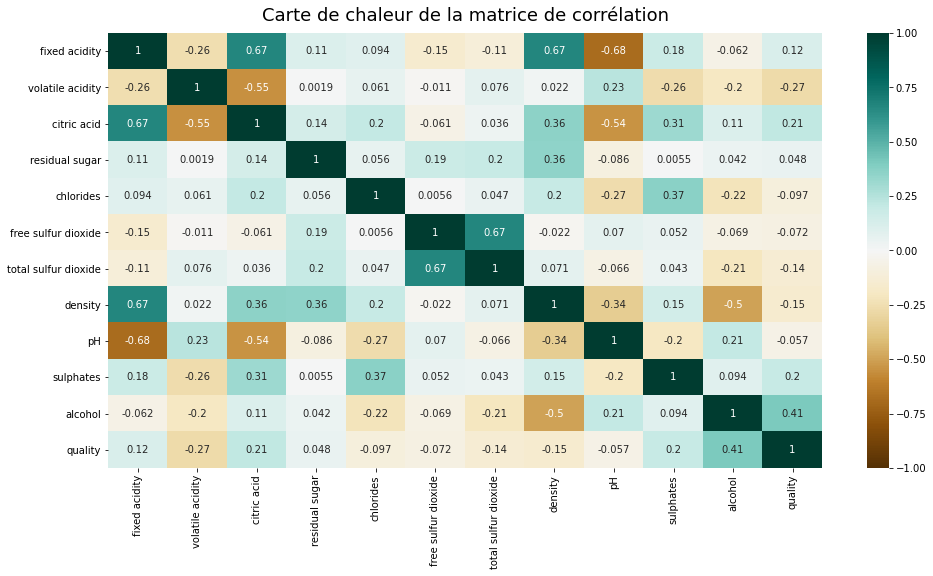

In [15]:
#Increase the size of the headmap
plt.figure(figsize=(16, 8))
# Create the correlation matrix heatmap
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# set anotations to true to display correlation
heatmap = sns.heatmap(df.iloc[:,:].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# Give a title to the heatmap.
# cmap change the color of the map
heatmap.set_title('Carte de chaleur de la matrice de corrélation', fontdict={'fontsize':18}, pad=12);
#save the image as a png image
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

#### <span style = 'color:blue'> une inspection visuelle de la matrice de corrélation, nous pouvons voir que notre ensemble de données a des corrélations négatives et positives. Aucune des corrélations n'est très forte (>80). Soit les corrélations les plus fortes se situent autour de 0,68 </span>

### 5. Répartissez les données en deux ensembles : 70% pour l’entrainement (train) et 30% pour le test (test) (random_state =10).

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3, stratify = df['quality'], random_state = 10)
print("test : ", test.groupby('quality').size())
print("train : ", train.groupby('quality').size())

test :  quality
0    415
1     65
dtype: int64
train :  quality
0    967
1    152
dtype: int64


### 6. Indiquez le nombre d’individus dans chaque classe de l’ensemble train.

In [21]:
print("TEST : ", "\n" , test.groupby('quality').size())
print("TRAIN : ", "\n" , train.groupby('quality').size())

TEST :  
 quality
0    415
1     65
dtype: int64
TRAIN :  
 quality
0    967
1    152
dtype: int64


#### <span style = 'color:blue'> Dans la classe de test, nous avons 65 individus classés 1 (bonne qualité) et 415 individus classés 0 (mauvaise qualité), Dans notre classe de formation nous avons 152 individus classés 1 (bonne qualité) et 975 individus classés 0 (mauvaise qualité) qualité) </span>

## Étape 2 : Arbre de décision (10 points)

### 1. Développez un arbre de décision qui permet de prédire la quality à partir de l’en- semble des caractéristiques. (NB : considérez une profondeur de 2).

In [38]:
#Creation des matrices de characteristiques
X_train = train[['fixed acidity',
       'volatile acidity',
       'citric acid',
       'residual sugar',
       'chlorides',
       'free sulfur dioxide',
       'total sulfur dioxide',
       'density',
       'pH', 
       'sulphates',
       'alcohol']]
Y_train = train['quality']

X_test = test[['fixed acidity',
       'volatile acidity',
       'citric acid',
       'residual sugar',
       'chlorides',
       'free sulfur dioxide',
       'total sulfur dioxide',
       'density',
       'pH', 
       'sulphates',
       'alcohol']]
Y_test = test['quality']

# lister les nom des feastures et le nom des classes
feature_names = list(df.iloc[:0,0:-1].columns)
class_names = ["0" , "1"]
print(feature_names)
print(class_names)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
['0', '1']


In [39]:
#development de l'arbre de decision avec une profondeur de 2
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

### 2. Représentez l’arbre de décision.

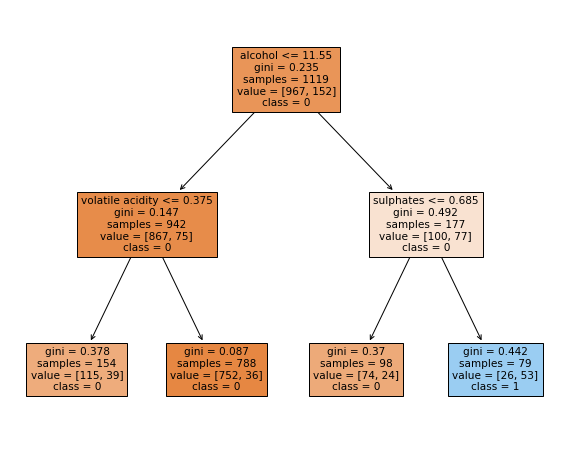

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,8))
plot_tree(dt, feature_names = feature_names, class_names = class_names, filled = True);
fig.savefig("decistion_tree.png")

### 3. Identifiez les variables retenues par l’arbre de décision.

#### <span style = 'color:blue'> Les Variables qui ont été retenues par l'arbre de décision sont : alcohol, volatile acidity and sulphates.</span>

### 4. En se basant sur les données de test (test), déterminez le taux de classification global et les taux de classification par classe (en pourcentage).


In [41]:
from sklearn import metrics
prediction = dt.predict(X_test)
print(f"La precision de l'arbre de decision est : {metrics.accuracy_score(prediction, Y_test)}")

La precision de l'arbre de decision est : 0.8833333333333333


#### <span style = 'color:blue'> La precision de l'arbre de decision est : 88.33% </span>

Text(0.5, 1.0, 'Matrice de confusion pour h=2')

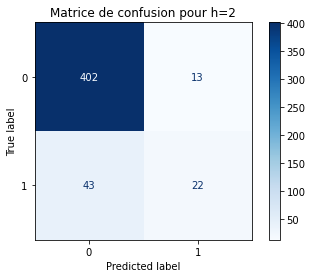

In [43]:
disp = metrics.plot_confusion_matrix(dt, X_test, Y_test,
                                    display_labels=class_names,
                                    cmap=plt.cm.Blues,
                                    normalize=None)
disp.ax_.set_title('Matrice de confusion pour h=2')

In [52]:
print("Taux de classification pour la classe 0 : ", round((402/(402+43))*100, 2), "%")
print("Taux de classification pour la classe 1 : ", round((22/(22+13))*100, 2), "%")
print("Taux de classification pour global : ", round(((402+22)/(402+43+22+13))*100, 2), "%")

Taux de classification pour la classe 0 :  90.34 %
Taux de classification pour la classe 1 :  62.86 %
Taux de classification pour global :  88.33 %


#### <span style = 'color:blue'>Le taux de classification pour la classe 0 est 90.34 %, le taux de classification pour la classe 1 est 62.86 % et finallement le taux de classification global est  88.33 %</span>

### 5. Interprétez/critiquez les résultats. Commentez la robustesse du modèle et justifiez.

#### <span style = 'color:blue'> Lorsque nous examinons le taux global de classification du modèle, nous pouvons supposer que le modèle est bon pour effectuer la classification d'un bon et d'un mauvais vin. Mais quand on regarde le taux de classification du bon vin, on peut observer qu'il ne prédit que si un vin est bon 62% du temps. Parce que la classification la plus importante est de savoir quand un vin est bon compte tenu de la quantité de mauvais vin présente dans l'ensemble de données (217 vs 1382) le modèle n'est pas si fiable pour cela. Peut-être que si la variable de qualité (1,0) du vin avait été linéaire et non binaire, cela aurait été plus utile car nous pourrions observer à quel point le vin est mauvais et bon dans un intervalle linéaire, mais il s'agit d'un problème de collecte de données. </span>